1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [195]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, Normalizer
df = pd.read_csv("https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv")
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [196]:
df_d = pd.get_dummies(df['default'])
df_s = pd.get_dummies(df['student'])
df_d.drop('No',inplace = True,axis = 1)
df_s.drop('No',inplace = True,axis = 1)
df_d = df_d.rename(columns={'Yes':'default'})
df_s = df_s.rename(columns={'Yes':'student'})

df_f = pd.concat([df_d,df[['balance']],df_s,df[['income']]],axis=1)

df_f.head(10)


,default,balance,student,income
0,0,729.526495,0,44361.625074
1,0,817.180407,1,12106.134700
2,0,1073.549164,0,31767.138947
3,0,529.250605,0,35704.493935
4,0,785.655883,0,38463.495879
5,0,919.588530,1,7491.558572
6,0,825.513331,0,24905.226578
7,0,808.667504,1,17600.451344
8,0,1161.057854,0,37468.529288
9,0,0.000000,0,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

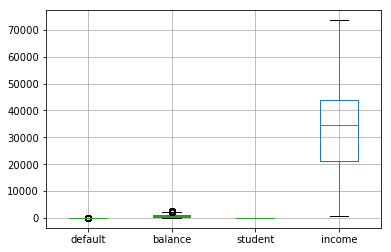

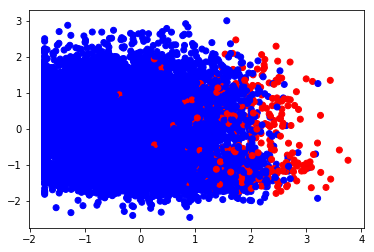

In [197]:
import pylab as plt
%matplotlib inline

df_f.boxplot()
plt.show()

X = df_f[['balance','income']]
y = df_f['default']
nom = StandardScaler()
nom.fit(X)
X = nom.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(penalty = 'l1')
clf.fit(X_train, y_train)

fig, ax = plt.subplots()
colors = {'Yes':'Red','No':'Blue'}
x = X[:,0]
y = X[:,1]
ax.scatter(x, y, c=df['default'].apply(lambda x: colors[x]))
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

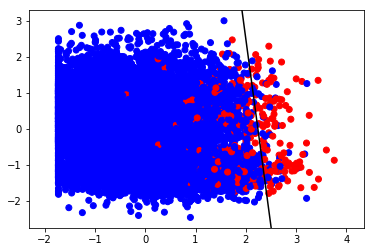

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np

X = df_f[['balance','income']]
y = df_f['default']
nom = StandardScaler()
nom.fit(X)
X = nom.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(penalty = 'l1')
clf.fit(X_train, y_train)

fig, ax = plt.subplots()
colors = {'Yes':'Red','No':'Blue'}
x = X[:,0]
y = X[:,1]
ax.scatter(x, y, c=df['default'].apply(lambda x: colors[x]))

xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
coeff = clf.coef_[0]
a = -coeff[0] / coeff[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_[0]) / coeff[1]

plt.plot(xx, yy, c='black')
plt.ylim(ymin,ymax)

plt.show()

Area under the ROC curve : 0.942674


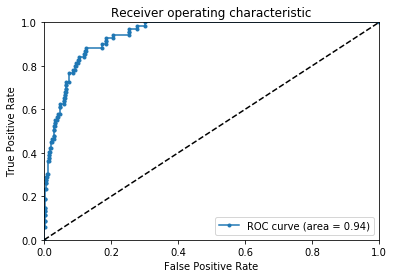

In [199]:
from sklearn.metrics import roc_curve, auc

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

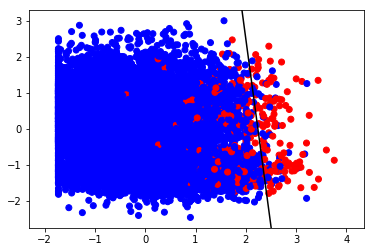

In [200]:
X = df_f[['student','balance','income']]
y = df_f['default']
nom = StandardScaler()
nom.fit(X)
X = nom.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, ax = plt.subplots()
colors = {'Yes':'Red','No':'Blue'}
x = X[:,1]
y = X[:,2]
ax.scatter(x, y, c=df['default'].apply(lambda x: colors[x]))

xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
coeff = clf.coef_[0]
a = -coeff[0] / coeff[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_[0]) / coeff[1]

plt.plot(xx, yy, c='black')
plt.ylim(ymin,ymax)

plt.show()

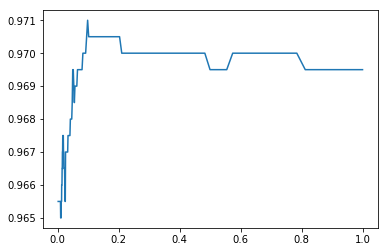

In [201]:
# Create linear regression object
alphas = np.logspace(-3,0,200)

scores = []

for alpha in alphas:
    clf = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(alphas,scores)


In [202]:
score = clf.score(X_test,y_test)
alpha_best = alphas[np.argmax(scores)]
print (score)
print(alpha_best)
print(clf.coef_)

0.9695
0.0977124153535
[[-0.21413182  2.79777413  0.09214653]]


[[-0.11035356  1.90265561  0.07912489]]


/Users/bindy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


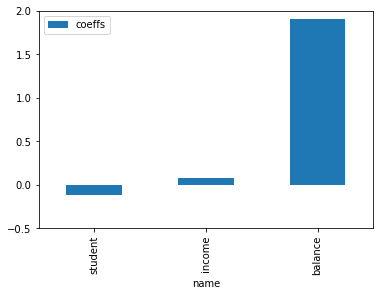

In [203]:
clf = LogisticRegression(C=alpha_best, penalty = 'l2').fit(X_train,y_train)
print(clf.coef_)

coef_df = pd.DataFrame({'coeffs':clf.coef_[0], 'name':['student','balance','income']})
coef_df=coef_df.sort(['coeffs'])
coef_df.plot(x='name',y='coeffs',kind='bar',ylim = [-.5,2])

Area under the ROC curve : 0.943560


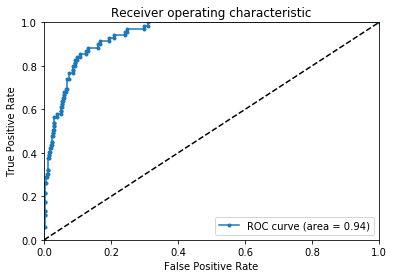

In [204]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=alpha_best,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

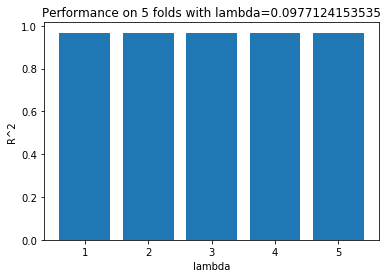

In [205]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(C = alpha_best)
scores = cross_val_score(logreg, X_test, y_test, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha_best))
plt.bar(range(1,6),scores)
plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [206]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)


0.96899999999999997

The performamce of DT is also quite good compare to logit regression

8) Find the optimal decision tree depth and compute the AUC ROC. 

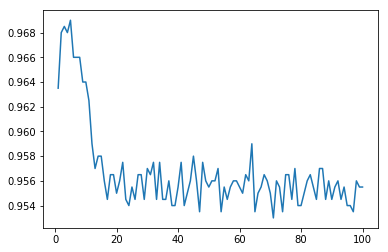

In [207]:
#iterate to find the best depth and plot depth vs. score
score = []
for i in range(100):
    clf = tree.DecisionTreeClassifier(max_depth = i+1).fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
plt.plot(range(1,101,1), score)

In [208]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

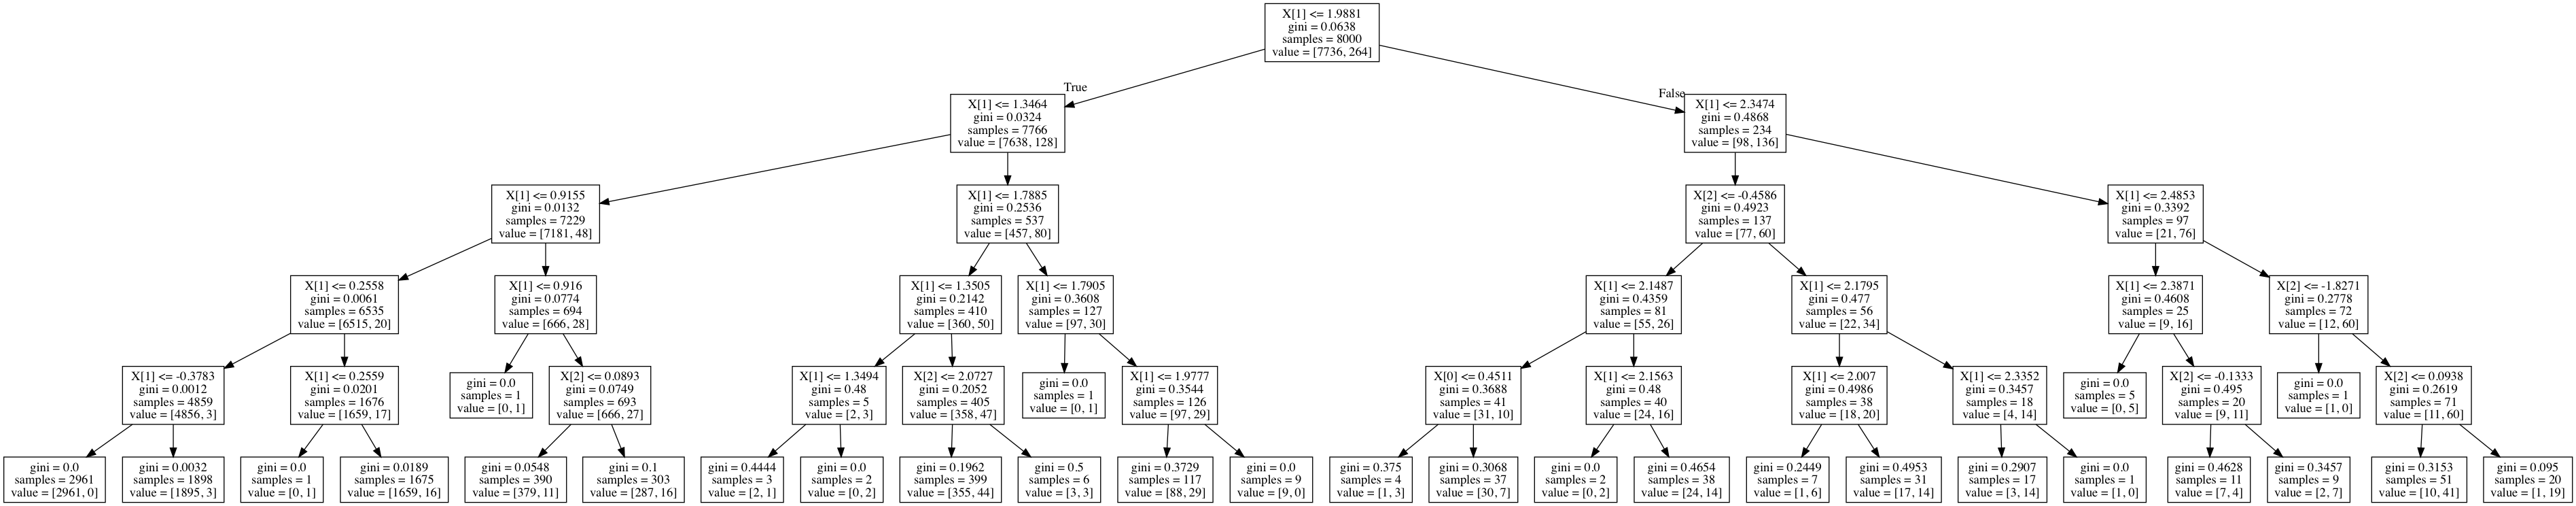

In [209]:
from __future__ import print_function

import os
import subprocess
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
visualize_tree(dtc, feature_names=['x'])

dot_data=export_graphviz(dtc, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


5
Area under the ROC curve : 0.921757


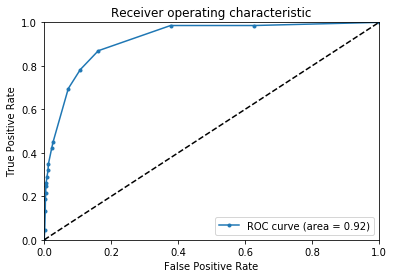

In [210]:
#print the best depth
best_depth_index = np.argmax(score)
best_depth = range(1,101,1)[best_depth_index]
print(best_depth)

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,tree.DecisionTreeClassifier,max_depth = best_depth)
generate_ROCplot(fpr,tpr,'DT',roc_auc)

we can see that when tree depth is too deep, the classifier doesn't generalize well since it will just remember the data from the trainig set